# Data preprocessing


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [53]:
df_business = pd.read_csv('business.csv')

In [54]:
df_business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


### Airline analysis

In [56]:
df_business['airline'].value_counts()

airline
Vistara      60589
Air India    32898
Name: count, dtype: int64

### From/To Analysis

In [11]:
df_business['from'].value_counts()

from
Mumbai       19858
Delhi        18316
Bangalore    16441
Kolkata      13473
Hyderabad    12870
Chennai      12529
Name: count, dtype: int64

In [12]:
df_business['to'].value_counts()

to
Mumbai       18991
Delhi        16707
Bangalore    16198
Kolkata      14758
Hyderabad    13675
Chennai      13158
Name: count, dtype: int64

In [13]:
df_business.dtypes

date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
dtype: object

## Data preparation
### Conversion of time_taken from categories to hours (float)

In [14]:
# convert time_taken to hours flight_duration

def time_to_hours(time_str: str) -> float:
    parts = time_str.split(" ")
    hours = 0
    minutes = 0
    try:
        hours = float(parts[0].replace('h', ''))
        minutes = float(parts[1].replace('m', ''))
    except ValueError as e:
        print(time_str)
        print(e)
    return hours + minutes / 60

df_economy['time_taken'] = df_economy['time_taken'].apply(time_to_hours)
df_business['time_taken'] = df_business['time_taken'].apply(time_to_hours)
df_economy

1.03h m
could not convert string to float: ''
1.02h m
could not convert string to float: ''
1.03h m
could not convert string to float: ''
1.01h m
could not convert string to float: ''


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,2.166667,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,2.333333,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,2.166667,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,2.250000,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,2.333333,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13.833333,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13.833333,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20.583333,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23.333333,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


In [15]:
df_economy['time_taken'].value_counts()

time_taken
2.166667     3081
2.250000     2912
2.750000     2006
2.083333     1969
2.833333     1724
             ... 
47.750000       1
40.750000       1
38.500000       1
44.500000       1
41.500000       1
Name: count, Length: 479, dtype: int64

### Removing flight number code (ch_code and num_code )

In [36]:
df_economy.drop(['ch_code', 'num_code'], axis=1, inplace=True)
df_business.drop(['ch_code', 'num_code'], axis=1, inplace=True)

KeyError: "['ch_code', 'num_code'] not found in axis"

In [17]:
df_economy['stop'].value_counts()

stop
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      162114
non-stop                                                                         27942
2+-stop                                                                          12205
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1063
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                  588
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                432
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          226
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t\t\t\t\t\t\t\t\t\t\t\t                  193
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JR

In [18]:
df_business['stop'].value_counts()

stop
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                   81489
non-stop                                                                      8102
2+-stop                                                                       1083
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t              810
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t              776
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t              257
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t            242
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t              152
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t               93
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t               86
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t       75
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t         71

### Convert the number of stops from strings to numeric values (0, 1, or 2)

In [19]:
def convert_stops(stops_str: str) -> int:
    stops = stops_str.split("-")[0][0]
    return 0 if stops == "n" else int(stops)

df_economy['stop'] = df_economy['stop'].apply(convert_stops)
df_business['stop'] = df_business['stop'].apply(convert_stops)
df_economy

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_number
0,11-02-2022,SpiceJet,18:55,Delhi,2.166667,0,21:05,Mumbai,"5,953",SG8709
1,11-02-2022,SpiceJet,06:20,Delhi,2.333333,0,08:40,Mumbai,"5,953",SG8157
2,11-02-2022,AirAsia,04:25,Delhi,2.166667,0,06:35,Mumbai,"5,956",I5764
3,11-02-2022,Vistara,10:20,Delhi,2.250000,0,12:35,Mumbai,"5,955",UK995
4,11-02-2022,Vistara,08:50,Delhi,2.333333,0,11:10,Mumbai,"5,955",UK963
...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,07:05,Chennai,13.833333,1,20:55,Hyderabad,"7,697",UK832
206770,31-03-2022,Vistara,07:05,Chennai,13.833333,1,20:55,Hyderabad,"7,709",UK832
206771,31-03-2022,Vistara,12:30,Chennai,20.583333,1,09:05,Hyderabad,"8,640",UK826
206772,31-03-2022,Vistara,09:45,Chennai,23.333333,1,09:05,Hyderabad,"8,640",UK822


### Convert departure and arrival times from HH:MM to categories (*Morning, Afternoon, Evening, Night*)

In [20]:
def time_to_category(time_str: str) -> str:
    hour = int(time_str.split(':')[0])  # Extract the hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_economy['dep_time'] = df_economy['dep_time'].apply(time_to_category)
df_economy['arr_time'] = df_economy['arr_time'].apply(time_to_category)
df_business['dep_time'] = df_business['dep_time'].apply(time_to_category)
df_business['arr_time'] = df_business['arr_time'].apply(time_to_category)
df_economy

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_number
0,11-02-2022,SpiceJet,Evening,Delhi,2.166667,0,Night,Mumbai,"5,953",SG8709
1,11-02-2022,SpiceJet,Morning,Delhi,2.333333,0,Morning,Mumbai,"5,953",SG8157
2,11-02-2022,AirAsia,Night,Delhi,2.166667,0,Morning,Mumbai,"5,956",I5764
3,11-02-2022,Vistara,Morning,Delhi,2.250000,0,Afternoon,Mumbai,"5,955",UK995
4,11-02-2022,Vistara,Morning,Delhi,2.333333,0,Morning,Mumbai,"5,955",UK963
...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,"7,697",UK832
206770,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,"7,709",UK832
206771,31-03-2022,Vistara,Afternoon,Chennai,20.583333,1,Morning,Hyderabad,"8,640",UK826
206772,31-03-2022,Vistara,Morning,Chennai,23.333333,1,Morning,Hyderabad,"8,640",UK822


### Compute distances between cities (precompute to save time), to include a new distance feature that better represent the from and to features

In [21]:
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

# Initialize the geolocator
geolocator = Nominatim(user_agent="geoapi")

# Function to get coordinates of a city
def get_coordinates(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None
    
distances = dict()

def get_distance(city1, city2):
    # Create a sorted tuple key for consistent lookups (city1, city2) == (city2, city1)
    if city1 == city2:
        return 0
    
    key = tuple(sorted([city1, city2]))
    
    if key not in distances:
        coords1 = get_coordinates(city1)
        coords2 = get_coordinates(city2)
        
        if coords1 and coords2:
            distances[key] = geodesic(coords1, coords2).kilometers
        else:
            distances[key] = None  # Handle cases where coordinates are not found
    
    return distances[key]
 

In [24]:
unique_cities = set(pd.unique(df_economy['from']).tolist() + pd.unique(df_economy['to']).tolist() + pd.unique(df_business['from']).tolist() + pd.unique(df_business['to']).tolist())
for city in unique_cities:
    for city2 in unique_cities:
        get_distance(city, city2)

In [25]:
df_economy['distance'] = df_economy.apply(
    lambda row: get_distance(row['from'], row['to']),
    axis=1
)
df_economy

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_number,distance
0,11-02-2022,SpiceJet,Evening,Delhi,2.166667,0,Night,Mumbai,"5,953",SG8709,1143.524859
1,11-02-2022,SpiceJet,Morning,Delhi,2.333333,0,Morning,Mumbai,"5,953",SG8157,1143.524859
2,11-02-2022,AirAsia,Night,Delhi,2.166667,0,Morning,Mumbai,"5,956",I5764,1143.524859
3,11-02-2022,Vistara,Morning,Delhi,2.250000,0,Afternoon,Mumbai,"5,955",UK995,1143.524859
4,11-02-2022,Vistara,Morning,Delhi,2.333333,0,Morning,Mumbai,"5,955",UK963,1143.524859
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,"7,697",UK832,511.055118
206770,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,"7,709",UK832,511.055118
206771,31-03-2022,Vistara,Afternoon,Chennai,20.583333,1,Morning,Hyderabad,"8,640",UK826,511.055118
206772,31-03-2022,Vistara,Morning,Chennai,23.333333,1,Morning,Hyderabad,"8,640",UK822,511.055118


In [26]:
df_business['distance'] = df_business.apply(
    lambda row: get_distance(row['from'], row['to']),
    axis=1
)
df_business

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_number,distance
0,11-02-2022,Air India,Evening,Delhi,2.000000,0,Evening,Mumbai,"25,612",AI868,1143.524859
1,11-02-2022,Air India,Evening,Delhi,2.250000,0,Night,Mumbai,"25,612",AI624,1143.524859
2,11-02-2022,Air India,Evening,Delhi,24.750000,1,Evening,Mumbai,"42,220",AI531,1143.524859
3,11-02-2022,Air India,Night,Delhi,26.500000,1,Night,Mumbai,"44,450",AI839,1143.524859
4,11-02-2022,Air India,Evening,Delhi,6.666667,1,Night,Mumbai,"46,690",AI544,1143.524859
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,Morning,Chennai,10.083333,1,Evening,Hyderabad,"69,265",UK822,511.055118
93483,31-03-2022,Vistara,Afternoon,Chennai,10.416667,1,Night,Hyderabad,"77,105",UK826,511.055118
93484,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,"79,099",UK832,511.055118
93485,31-03-2022,Vistara,Morning,Chennai,10.000000,1,Evening,Hyderabad,"81,585",UK828,511.055118


### Convert comma-formatted price string to numerical value

In [27]:
# price fix
df_economy['price'] = df_economy['price'].astype(str).str.replace(",", "").astype(int)
df_business['price'] = df_business['price'].astype(str).str.replace(",", "").astype(int)
df_economy

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_number,distance
0,11-02-2022,SpiceJet,Evening,Delhi,2.166667,0,Night,Mumbai,5953,SG8709,1143.524859
1,11-02-2022,SpiceJet,Morning,Delhi,2.333333,0,Morning,Mumbai,5953,SG8157,1143.524859
2,11-02-2022,AirAsia,Night,Delhi,2.166667,0,Morning,Mumbai,5956,I5764,1143.524859
3,11-02-2022,Vistara,Morning,Delhi,2.250000,0,Afternoon,Mumbai,5955,UK995,1143.524859
4,11-02-2022,Vistara,Morning,Delhi,2.333333,0,Morning,Mumbai,5955,UK963,1143.524859
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,7697,UK832,511.055118
206770,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,7709,UK832,511.055118
206771,31-03-2022,Vistara,Afternoon,Chennai,20.583333,1,Morning,Hyderabad,8640,UK826,511.055118
206772,31-03-2022,Vistara,Morning,Chennai,23.333333,1,Morning,Hyderabad,8640,UK822,511.055118


In [28]:
df_business

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_number,distance
0,11-02-2022,Air India,Evening,Delhi,2.000000,0,Evening,Mumbai,25612,AI868,1143.524859
1,11-02-2022,Air India,Evening,Delhi,2.250000,0,Night,Mumbai,25612,AI624,1143.524859
2,11-02-2022,Air India,Evening,Delhi,24.750000,1,Evening,Mumbai,42220,AI531,1143.524859
3,11-02-2022,Air India,Night,Delhi,26.500000,1,Night,Mumbai,44450,AI839,1143.524859
4,11-02-2022,Air India,Evening,Delhi,6.666667,1,Night,Mumbai,46690,AI544,1143.524859
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,Morning,Chennai,10.083333,1,Evening,Hyderabad,69265,UK822,511.055118
93483,31-03-2022,Vistara,Afternoon,Chennai,10.416667,1,Night,Hyderabad,77105,UK826,511.055118
93484,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,79099,UK832,511.055118
93485,31-03-2022,Vistara,Morning,Chennai,10.000000,1,Evening,Hyderabad,81585,UK828,511.055118


### Add another column, the type of the class


In [29]:
# Add a column class_type
df_economy['class_type'] = 0  # 0 per a economy
df_business['class_type'] = 1  # 1 per a business

In [30]:
df_economy

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_number,distance,class_type
0,11-02-2022,SpiceJet,Evening,Delhi,2.166667,0,Night,Mumbai,5953,SG8709,1143.524859,0
1,11-02-2022,SpiceJet,Morning,Delhi,2.333333,0,Morning,Mumbai,5953,SG8157,1143.524859,0
2,11-02-2022,AirAsia,Night,Delhi,2.166667,0,Morning,Mumbai,5956,I5764,1143.524859,0
3,11-02-2022,Vistara,Morning,Delhi,2.250000,0,Afternoon,Mumbai,5955,UK995,1143.524859,0
4,11-02-2022,Vistara,Morning,Delhi,2.333333,0,Morning,Mumbai,5955,UK963,1143.524859,0
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,7697,UK832,511.055118,0
206770,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,7709,UK832,511.055118,0
206771,31-03-2022,Vistara,Afternoon,Chennai,20.583333,1,Morning,Hyderabad,8640,UK826,511.055118,0
206772,31-03-2022,Vistara,Morning,Chennai,23.333333,1,Morning,Hyderabad,8640,UK822,511.055118,0


In [31]:
df_business

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_number,distance,class_type
0,11-02-2022,Air India,Evening,Delhi,2.000000,0,Evening,Mumbai,25612,AI868,1143.524859,1
1,11-02-2022,Air India,Evening,Delhi,2.250000,0,Night,Mumbai,25612,AI624,1143.524859,1
2,11-02-2022,Air India,Evening,Delhi,24.750000,1,Evening,Mumbai,42220,AI531,1143.524859,1
3,11-02-2022,Air India,Night,Delhi,26.500000,1,Night,Mumbai,44450,AI839,1143.524859,1
4,11-02-2022,Air India,Evening,Delhi,6.666667,1,Night,Mumbai,46690,AI544,1143.524859,1
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,Morning,Chennai,10.083333,1,Evening,Hyderabad,69265,UK822,511.055118,1
93483,31-03-2022,Vistara,Afternoon,Chennai,10.416667,1,Night,Hyderabad,77105,UK826,511.055118,1
93484,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,79099,UK832,511.055118,1
93485,31-03-2022,Vistara,Morning,Chennai,10.000000,1,Evening,Hyderabad,81585,UK828,511.055118,1


### Concatenate the two datasets

In [32]:
df_combined = pd.concat([df_economy, df_business], ignore_index=True)

df_combined

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_number,distance,class_type
0,11-02-2022,SpiceJet,Evening,Delhi,2.166667,0,Night,Mumbai,5953,SG8709,1143.524859,0
1,11-02-2022,SpiceJet,Morning,Delhi,2.333333,0,Morning,Mumbai,5953,SG8157,1143.524859,0
2,11-02-2022,AirAsia,Night,Delhi,2.166667,0,Morning,Mumbai,5956,I5764,1143.524859,0
3,11-02-2022,Vistara,Morning,Delhi,2.250000,0,Afternoon,Mumbai,5955,UK995,1143.524859,0
4,11-02-2022,Vistara,Morning,Delhi,2.333333,0,Morning,Mumbai,5955,UK963,1143.524859,0
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,Morning,Chennai,10.083333,1,Evening,Hyderabad,69265,UK822,511.055118,1
300257,31-03-2022,Vistara,Afternoon,Chennai,10.416667,1,Night,Hyderabad,77105,UK826,511.055118,1
300258,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,79099,UK832,511.055118,1
300259,31-03-2022,Vistara,Morning,Chennai,10.000000,1,Evening,Hyderabad,81585,UK828,511.055118,1


### Detecting outliers

In [30]:
df_combined.price.describe()

count    300261.000000
mean      20883.717666
std       22695.911266
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

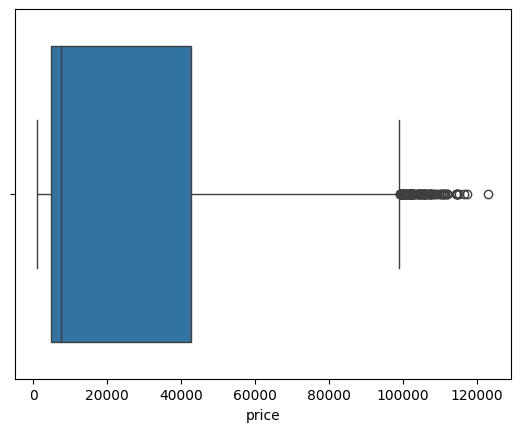

In [32]:
import seaborn as sns

sns.boxplot(x=df_combined['price'])

plt.show()

In [33]:
Q1 = df_combined['price'].quantile(0.25)

Q3 = df_combined['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

outliers = df_combined[(df_combined['price'] < lower_bound) | (df_combined['price'] > upper_bound)]

outliers

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_number,distance,class_type
215966,11-02-2022,Vistara,Evening,Delhi,21.083333,2,Afternoon,Kolkata,114434,UK809,1308.144157,1
215967,11-02-2022,Vistara,Evening,Delhi,21.083333,2,Afternoon,Kolkata,116562,UK809,1308.144157,1
216133,14-02-2022,Vistara,Afternoon,Delhi,17.583333,2,Morning,Kolkata,100395,UK817,1308.144157,1
216202,15-02-2022,Vistara,Morning,Delhi,6.500000,1,Afternoon,Kolkata,99129,UK995,1308.144157,1
216203,15-02-2022,Vistara,Morning,Delhi,8.000000,1,Afternoon,Kolkata,101369,UK963,1308.144157,1
...,...,...,...,...,...,...,...,...,...,...,...,...
293582,13-02-2022,Vistara,Morning,Chennai,9.666667,1,Evening,Bangalore,107597,UK836,287.374440,1
296109,13-02-2022,Vistara,Night,Chennai,11.500000,1,Morning,Kolkata,102832,UK838,1355.300874,1
296189,15-02-2022,Vistara,Morning,Chennai,15.833333,1,Night,Kolkata,102384,UK832,1355.300874,1
296278,17-02-2022,Vistara,Night,Chennai,11.500000,1,Morning,Kolkata,104624,UK838,1355.300874,1


In [34]:
outliers['class_type'].value_counts()


class_type
1    123
Name: count, dtype: int64

### Remove outliers

In [35]:
df_combined= df_combined[(df_combined['price'] >= lower_bound) & (df_combined['price'] <= upper_bound)]

df_combined


,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_number,distance,class_type
0,11-02-2022,SpiceJet,Evening,Delhi,2.166667,0,Night,Mumbai,5953,SG8709,1143.524859,0
1,11-02-2022,SpiceJet,Morning,Delhi,2.333333,0,Morning,Mumbai,5953,SG8157,1143.524859,0
2,11-02-2022,AirAsia,Night,Delhi,2.166667,0,Morning,Mumbai,5956,I5764,1143.524859,0
3,11-02-2022,Vistara,Morning,Delhi,2.250000,0,Afternoon,Mumbai,5955,UK995,1143.524859,0
4,11-02-2022,Vistara,Morning,Delhi,2.333333,0,Morning,Mumbai,5955,UK963,1143.524859,0
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,Morning,Chennai,10.083333,1,Evening,Hyderabad,69265,UK822,511.055118,1
300257,31-03-2022,Vistara,Afternoon,Chennai,10.416667,1,Night,Hyderabad,77105,UK826,511.055118,1
300258,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,79099,UK832,511.055118,1
300259,31-03-2022,Vistara,Morning,Chennai,10.000000,1,Evening,Hyderabad,81585,UK828,511.055118,1


### Encoding

In [46]:
categorical_cols = df_combined[['airline', 'dep_time', 'from', 'arr_time', 'to']]

categorical_cols.head()

,airline,dep_time,from,arr_time,to
0,SpiceJet,Evening,Delhi,Night,Mumbai
1,SpiceJet,Morning,Delhi,Morning,Mumbai
2,AirAsia,Night,Delhi,Morning,Mumbai
3,Vistara,Morning,Delhi,Afternoon,Mumbai
4,Vistara,Morning,Delhi,Morning,Mumbai


In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_cols:
    df_combined.loc[:, col] = df_combined[col].fillna("Missing")
    df_combined.loc[:, col] = label_encoder.fit_transform(df_combined[col])


In [39]:
df_combined

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_number,distance,class_type
0,11-02-2022,4,1,2,2.166667,0,3,5,5953,SG8709,1143.524859,0
1,11-02-2022,4,2,2,2.333333,0,2,5,5953,SG8157,1143.524859,0
2,11-02-2022,1,3,2,2.166667,0,2,5,5956,I5764,1143.524859,0
3,11-02-2022,7,2,2,2.250000,0,0,5,5955,UK995,1143.524859,0
4,11-02-2022,7,2,2,2.333333,0,2,5,5955,UK963,1143.524859,0
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,7,2,1,10.083333,1,1,3,69265,UK822,511.055118,1
300257,31-03-2022,7,0,1,10.416667,1,3,3,77105,UK826,511.055118,1
300258,31-03-2022,7,2,1,13.833333,1,1,3,79099,UK832,511.055118,1
300259,31-03-2022,7,2,1,10.000000,1,1,3,81585,UK828,511.055118,1


### Correlation matrix

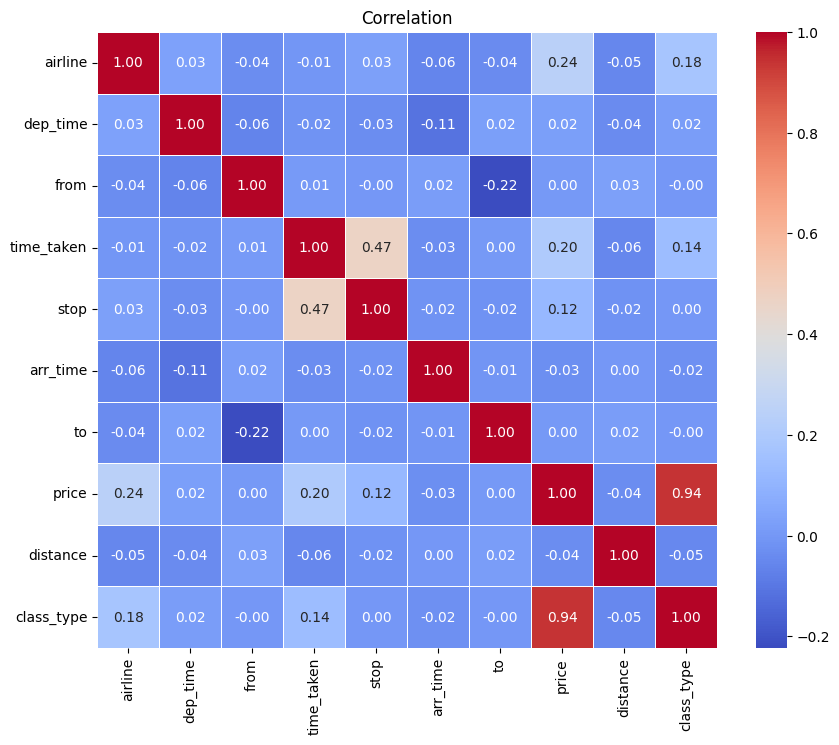

In [43]:
df_corr = df_combined.drop(['date', 'flight_number'], axis=1)
correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation')

plt.show()

In [44]:
df_economy['airline'].value_counts()

airline
Vistara      67270
Air India    47996
Indigo       43120
GO FIRST     23177
AirAsia      16098
SpiceJet      9011
StarAir         61
Trujet          41
Name: count, dtype: int64

In [35]:
# grid search scikit learn to get the best parameters
df_business

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,flight_number,distance,class_type
0,11-02-2022,Air India,Evening,Delhi,2.000000,0,Evening,Mumbai,25612,AI868,1143.524859,1
1,11-02-2022,Air India,Evening,Delhi,2.250000,0,Night,Mumbai,25612,AI624,1143.524859,1
2,11-02-2022,Air India,Evening,Delhi,24.750000,1,Evening,Mumbai,42220,AI531,1143.524859,1
3,11-02-2022,Air India,Night,Delhi,26.500000,1,Night,Mumbai,44450,AI839,1143.524859,1
4,11-02-2022,Air India,Evening,Delhi,6.666667,1,Night,Mumbai,46690,AI544,1143.524859,1
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,Morning,Chennai,10.083333,1,Evening,Hyderabad,69265,UK822,511.055118,1
93483,31-03-2022,Vistara,Afternoon,Chennai,10.416667,1,Night,Hyderabad,77105,UK826,511.055118,1
93484,31-03-2022,Vistara,Morning,Chennai,13.833333,1,Evening,Hyderabad,79099,UK832,511.055118,1
93485,31-03-2022,Vistara,Morning,Chennai,10.000000,1,Evening,Hyderabad,81585,UK828,511.055118,1


In [50]:
# ono hot encoding
categorical_variables = ['airline', 'dep_time', 'from', 'arr_time', 'to']
df_final = df_business.copy()
for category in categorical_variables:
    one_hot = pd.get_dummies(df_business[category], prefix=category)
    one_hot = one_hot.astype(int)
    df_final = pd.concat([one_hot, df_final], axis=1)
    df_final.drop([category], axis=1, inplace=True)
df_final.head()

,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,arr_time_Afternoon,arr_time_Evening,arr_time_Morning,arr_time_Night,...,dep_time_Night,airline_Air India,airline_Vistara,date,time_taken,stop,price,flight_number,distance,class_type
0,0,0,0,0,0,1,0,1,0,0,...,0,1,0,11-02-2022,2.000000,0,25612,AI868,1143.524859,1
1,0,0,0,0,0,1,0,0,0,1,...,0,1,0,11-02-2022,2.250000,0,25612,AI624,1143.524859,1
2,0,0,0,0,0,1,0,1,0,0,...,0,1,0,11-02-2022,24.750000,1,42220,AI531,1143.524859,1
3,0,0,0,0,0,1,0,0,0,1,...,1,1,0,11-02-2022,26.500000,1,44450,AI839,1143.524859,1
4,0,0,0,0,0,1,0,0,0,1,...,0,1,0,11-02-2022,6.666667,1,46690,AI544,1143.524859,1
